In [1]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR


from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

# Visualization lib
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.io as pio
pio.renderers.default = "svg"

In [2]:
# Load the data
data = pd.read_csv('CarPrice_Assignment.csv')
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
data.shape

(205, 26)

In [4]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### 1. Handing Missing & Duplicate Values

In [6]:
# Checking for missing values
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

###### No missing values present

In [7]:
data[data.duplicated()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


###### No duplicate values present

### 2. Exploratory Data Analysis

In [8]:
# 1. Car ID : Unique id of each observation (Interger) - Drop as not required for prediction
data = data.drop(['car_ID'], axis = 'columns')

In [9]:
data['CompanyName'] = data['CarName'].apply(lambda x : x.split(' ')[0])
data = data.drop(['CarName'], axis = 'columns')

In [10]:
# Fixing the spelling error

data['CompanyName'].replace('maxda','mazda', inplace = True)
data['CompanyName'].replace('porcshce','porsche', inplace = True)
data['CompanyName'].replace('toyouta','toyota', inplace = True)
data['CompanyName'].replace('vokswagen','volkswagen', inplace = True)
data['CompanyName'].replace('vw','volkswagen', inplace = True)

In [11]:
# Getting all Categorical Features
categorical_features = []
categorical_features = list(data.select_dtypes(exclude = [np.float, np.int64]).columns)
# categorical_features.remove('CarName')
categorical_features.append('symboling')
categorical_features

['fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'CompanyName',
 'symboling']

In [12]:
# Getting all Numeric Features
numeric_features = data.select_dtypes(include = [np.float, np.int64]).columns
numeric_features = numeric_features.drop(['symboling'])
numeric_features

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

#### 1. Univariante Analysis

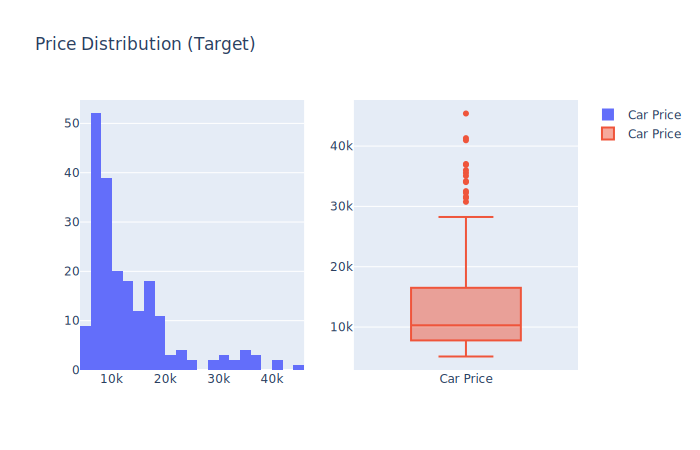

In [13]:
fig = make_subplots(rows = 1, cols = 2)
fig.add_trace(go.Histogram(
    x = data['price'],
    name = 'Car Price'
), row = 1, col = 1)

fig.add_trace(go.Box(
    y = data['price'],
    name = 'Car Price'
), row = 1, col = 2)

fig['layout'].update(title = 'Price Distribution (Target)', width = 950)
iplot(fig)

In [14]:
data.price.describe(percentiles = [0.25, 0.50, 0.75, 0.85, 0.90, 1]).T

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64

* Price distribution seemed to be right skewed
* Majority of cars fall under car price 16k
* There is a significant difference in Mean (13276.71) & Median (10295)


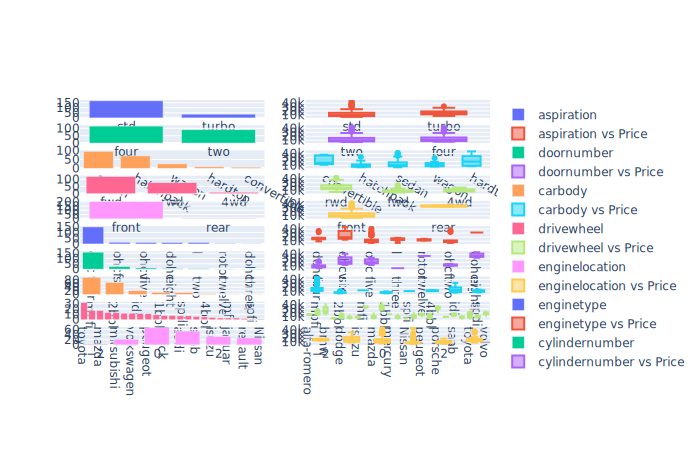

In [15]:
fig = make_subplots(rows = 11, cols = 2)
index = 1
for row in range(1, 11):
    feature_name = categorical_features[index]
    df = data[feature_name].value_counts()
    fig.add_trace(go.Bar(
        x = df.index,
        y = df.values,
        name = feature_name
    ),row = row, col = 1)
    fig.add_trace(go.Box(
        x = data[feature_name],
        y = data['price'],
        name = feature_name + ' vs Price' 
    ), row = row, col = 2)
    index = index + 1
        
fig['layout'].update(height = 3000, width = 950)
iplot(fig)

#### Inferences for categorical features:

* Toyota seemed most favoured car, Jaguar and Buick seem to have highest average price.
* Number of car gas fueled are more than diseal, diesel has higher average price than gas.
* Sedan is most preferred car
* ohc Engine type most prefered & ohcv has higest price range
* symboling 0 & 1 most prefered, The cars with -1 symboling seems to be high priced (as it makes sense too, insurance risk rating -1 is quite good).
* hardtop and convertible have higher average price.
* doornumber variable is not affecting the price much. There is no sugnificant difference between the categories in it.
* It seems aspiration with turbo have higher price range than the std(though it has some high values outside the whiskers.)
* Very few datapoints for enginelocation categories to make an inference.
* Most common number of cylinders are four, six and five. Though eight cylinders have the highest price range.
* mpfi and 2bbl are most common type of fuel systems. mpfi and idi having the highest price range. But there are few data for other categories to derive any meaningful inference
* A very significant difference in drivewheel category. Most high ranged cars seeme to prefer rwd drivewheel.

In [16]:
# for feature in numeric_features:
#     fig = px.histogram(data, x = feature, marginal = 'box', color_discrete_sequence = ['lightblue'])
#     fig.show()

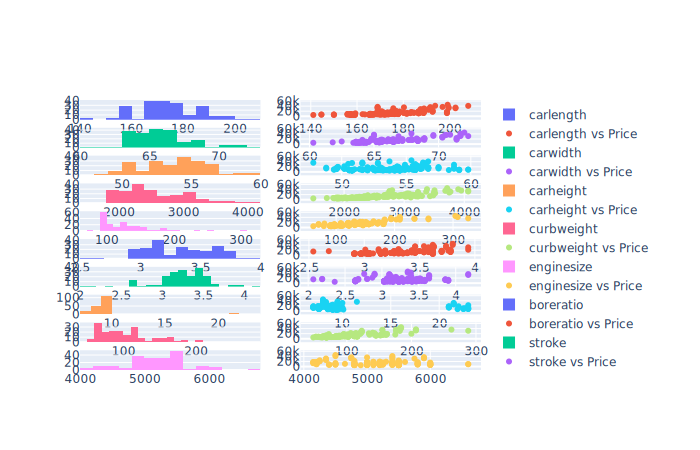

In [17]:
fig = make_subplots(rows = 10, cols = 2)
index = 1
for row in range(1, 11):
    feature_name = numeric_features[index]
    df = data[feature_name].value_counts()
    fig.add_trace(go.Histogram(
        x = data[feature_name],
        name = feature_name
    ),row = row, col = 1)
    fig.add_trace(go.Scatter(
        x = data[feature_name],
        y = data['price'],
        mode = 'markers',
        name = feature_name + ' vs Price'
    ), row = row, col = 2)
    index = index + 1
        
fig['layout'].update(height = 3000, width = 950)
iplot(fig)

* carwidth, carlength and curbweight seems to have a poitive correlation with price.
* carheight doesn't show any significant trend with price.
* enginesize, boreratio, horsepower, wheelbase - seem to have a significant positive correlation with price.
* citympg, highwaympg - seem to have a significant negative correlation with price.


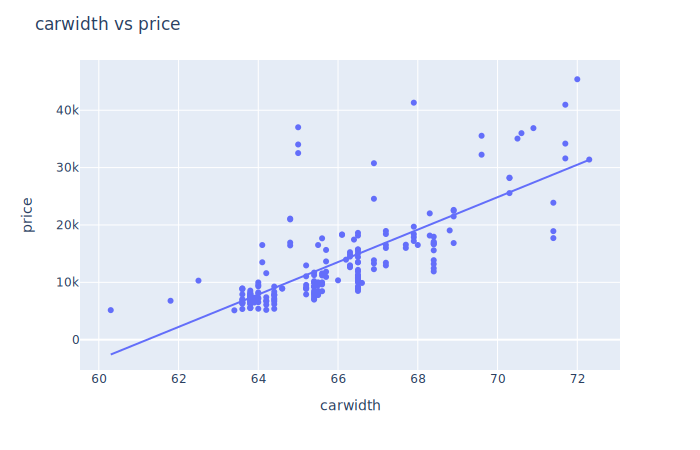

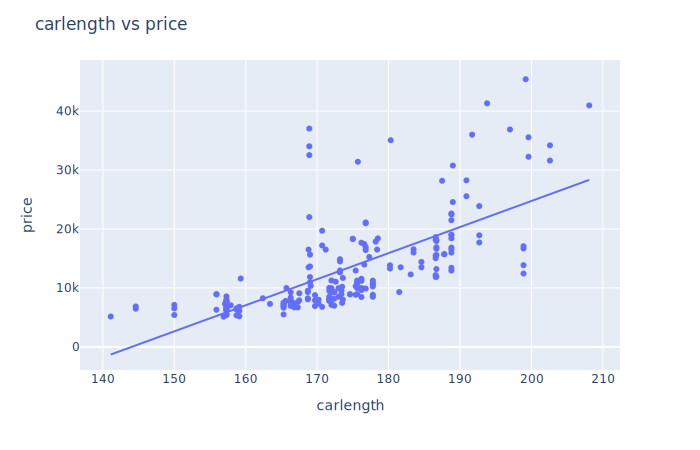

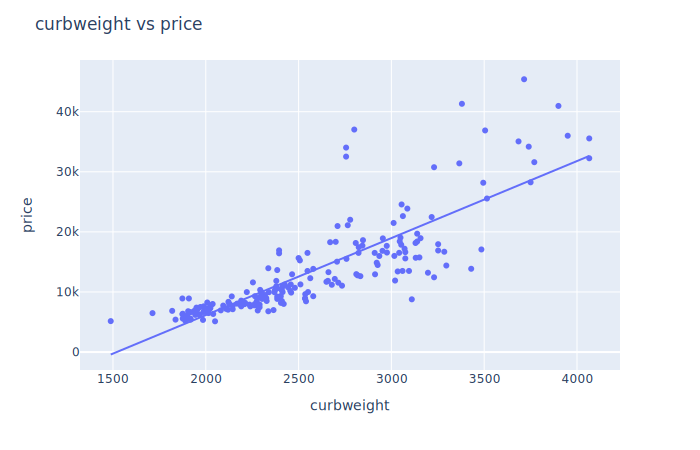

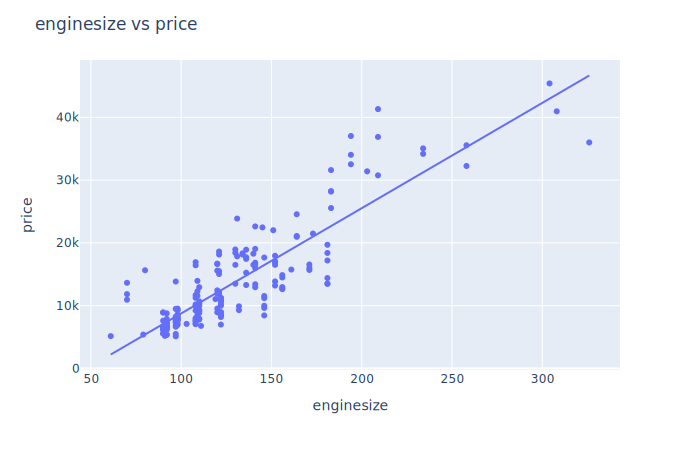

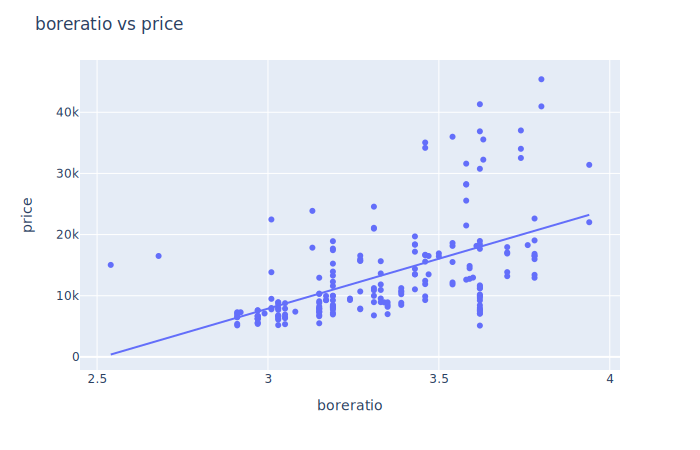

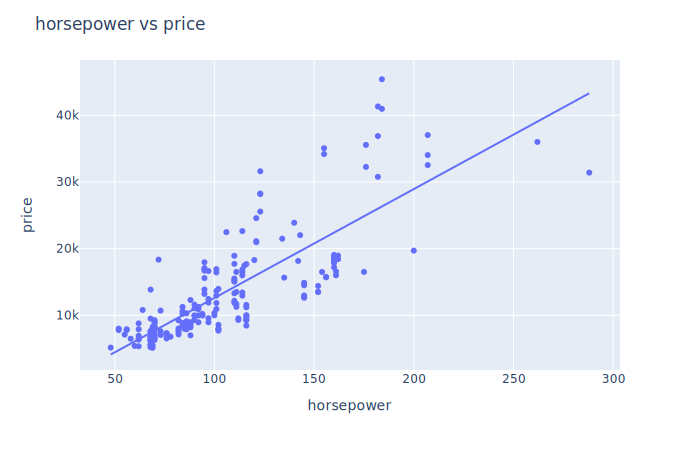

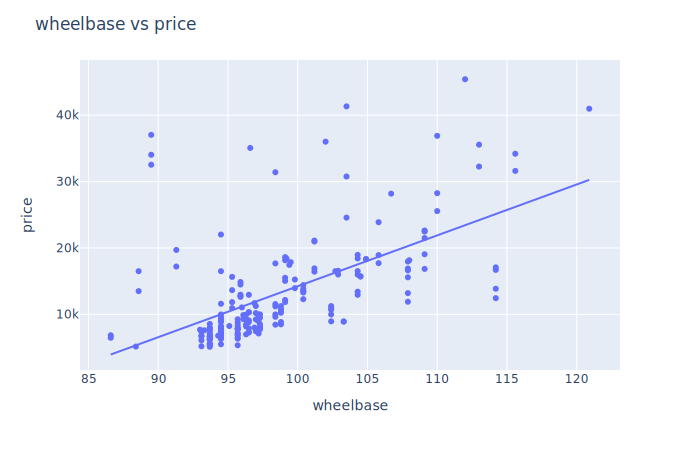

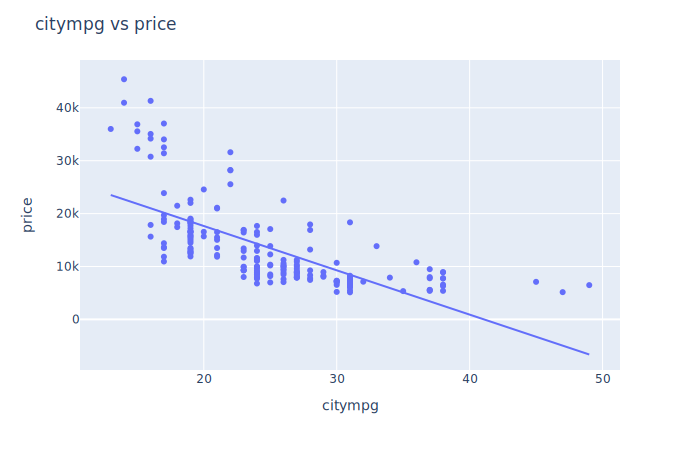

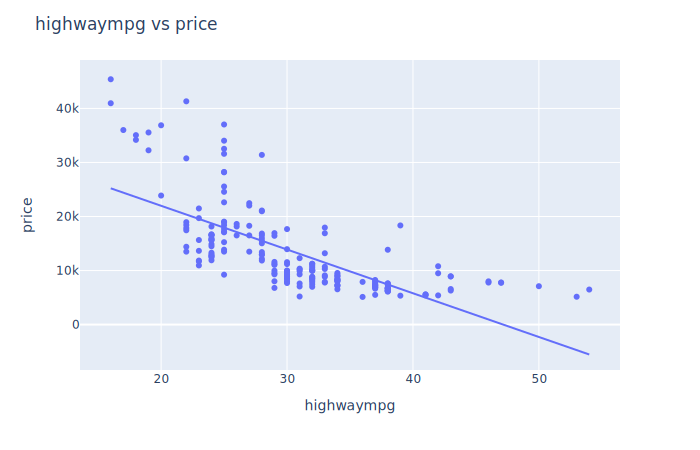

In [18]:
correlatated_features = ['carwidth', 'carlength', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'wheelbase','citympg','highwaympg']
for feature in correlatated_features:
    fig = px.scatter(data, x = data[feature], y = data['price'], trendline = "ols")
    fig['layout'].update(title = feature + ' vs price')
    fig.show()

In [19]:
data.corr().style.background_gradient(cmap="Blues")

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


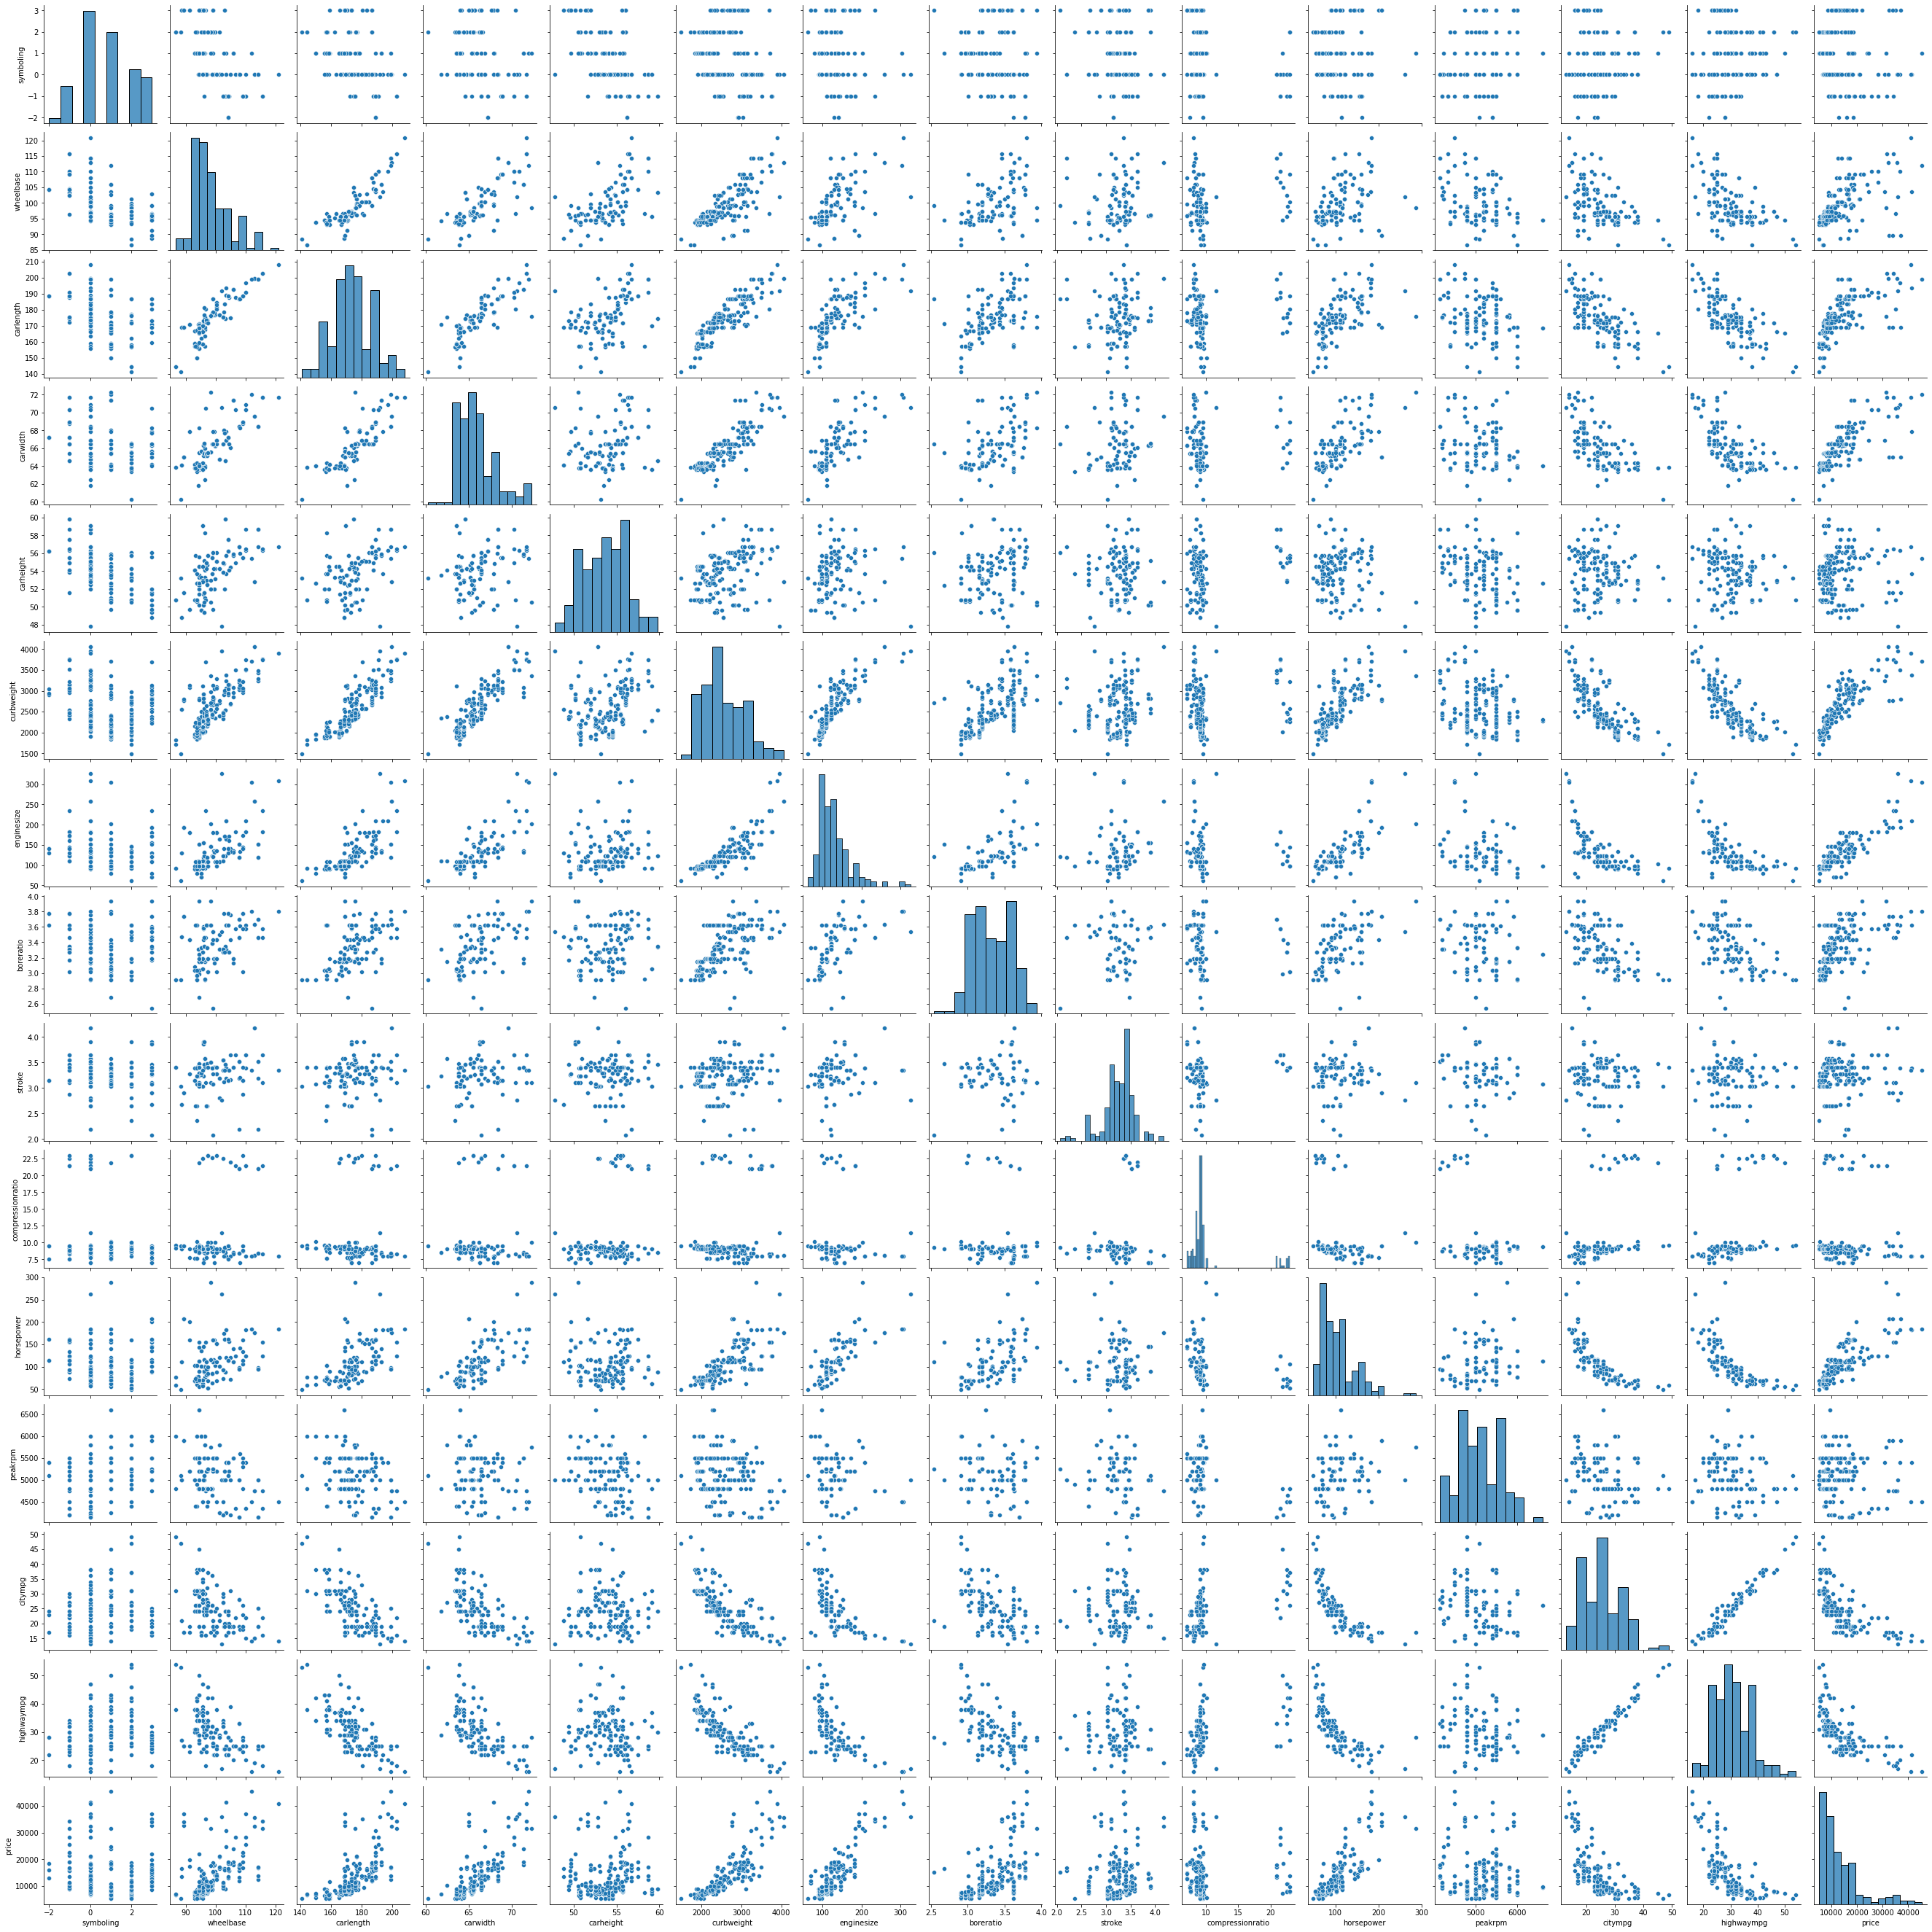

In [20]:
sns.pairplot(data)

## 3. Feature Engineering

In [21]:
cars_data = data
cars_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CompanyName
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [22]:
# Converting cylindernumber to Ordinal feature
cars_data['cylindernumber'] = cars_data['cylindernumber'].map({'four': 4, 'six' : 6, 'five' : 5, 'three' : 3, 'twelve' : 12, 'two' : 2, 'eight' : 8})
cars_data['doornumber'] = cars_data['doornumber'].map({'four': 4, 'two' : 2})

In [23]:
# Dummy variables

cars_data = pd.concat([cars_data, pd.get_dummies(cars_data['fueltype'], drop_first = True)], axis = 'columns')
cars_data = pd.concat([cars_data, pd.get_dummies(cars_data['aspiration'], drop_first = True)], axis = 'columns')
cars_data = pd.concat([cars_data, pd.get_dummies(cars_data['carbody'], drop_first = True)], axis = 'columns')
cars_data = pd.concat([cars_data, pd.get_dummies(cars_data['drivewheel'], drop_first = True)], axis = 'columns')
cars_data = pd.concat([cars_data, pd.get_dummies(cars_data['enginetype'], drop_first = True)], axis = 'columns')
cars_data = pd.concat([cars_data, pd.get_dummies(cars_data['enginelocation'], drop_first = True)], axis = 'columns')
cars_data = pd.concat([cars_data, pd.get_dummies(cars_data['CompanyName'], drop_first = True)], axis = 'columns')
cars_data = pd.concat([cars_data, pd.get_dummies(cars_data['fuelsystem'], drop_first = True)], axis = 'columns')

In [24]:
cars_data.drop(['fueltype','aspiration','carbody','drivewheel','enginetype','cylindernumber','enginelocation','fuelsystem','CompanyName'], axis = 'columns', inplace = True)

In [25]:
cars_data.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,toyota,volkswagen,volvo,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
1,3,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,0,0,0,0,1,0,0
2,1,2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
3,2,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
4,2,4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0


## 4. Model Training 

In [26]:
X = cars_data.drop(['price'], axis = 'columns')
y = cars_data['price']

In [27]:
# Train & Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [28]:
def show_metrics(y_test, y_pred):
    score = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print('R2: {:.3f}'.format(score))
    print('MSE: {:.3f}'.format(mse))
    print('RMSE: {:.3f}'.format(rmse))

In [29]:
# 4. Hyper parameter tunning for Random Forest 
params = {
            'criterion' : ['mse','mae'],
            'n_estimators': [100, 200, 500],
            'max_features': [2, 3],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10],
            'max_depth' : [10,20,30]
}
gd = GridSearchCV(estimator = RandomForestRegressor(), param_grid = params, verbose = True, n_jobs = -1)
gd.fit(X, y)
print(gd.best_score_)
print(gd.best_params_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 1226 tasks      | elapsed:   58.2s
[Parallel(n_jobs=-1)]: Done 1620 out of 1620 | elapsed:  1.3min finished


0.6372287047307285
{'criterion': 'mae', 'max_depth': 20, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [34]:
rf_model = RandomForestRegressor(criterion = 'mae', max_depth = 10, max_features = 3, min_samples_leaf = 1, min_samples_split = 2,
                                 n_estimators = 100)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
show_metrics(y_test, y_pred)

R2: 0.888
MSE: 7386688.554
RMSE: 2717.846


In [31]:
lr_model = LinearRegression()
lr_model.fit(X, y)
y_pred = lr_model.predict(X_test)
show_metrics(y_test, y_pred)

R2: 0.952
MSE: 3145637.292
RMSE: 1773.594


## 5. Model Interpretability

In [37]:
shap.initjs()
explainer = shap.TreeExplainer(rf_model)

In [64]:
choosen_instance = X_test.iloc[[1]]
print(choosen_instance.horsepower)
shap_values = explainer.shap_values(choosen_instance)
shap.force_plot(explainer.expected_value, shap_values, choosen_instance)

181    156
Name: horsepower, dtype: int64


In [60]:
choosen_instance = X_test.iloc[[10]]
shap_values = explainer.shap_values(choosen_instance)
shap.force_plot(explainer.expected_value, shap_values, choosen_instance)

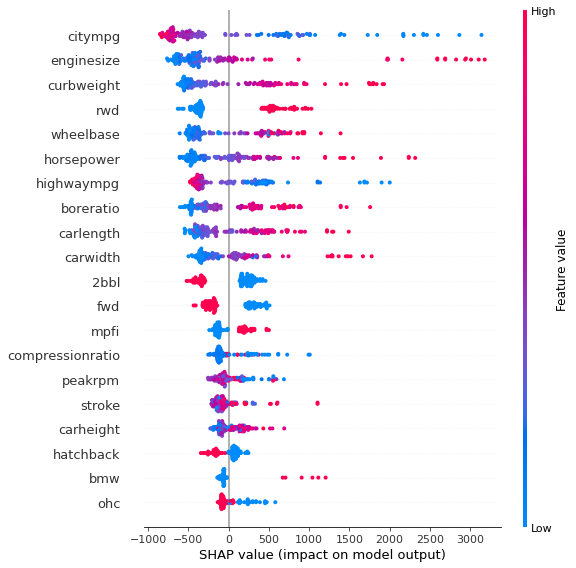

In [46]:
# calculate SHAP
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_train, approximate=False, check_additivity=False)

shap.summary_plot(shap_values, X_train)